In [1]:
import sys
import os
import torch
import numpy as np
import pandas as pd

In [5]:
k562_data = torch.load("/home/justinhong/data/k562-100.pt")

In [6]:
k562_data

{'expression_matrix': array([[0.        , 4.116087  , 1.6989243 , ..., 2.0414922 , 3.9585767 ,
         1.1737294 ],
        [0.        , 4.264735  , 0.7240735 , ..., 0.7240735 , 4.1708293 ,
         0.        ],
        [0.53746116, 4.0835495 , 1.1426188 , ..., 0.885135  , 3.825033  ,
         0.53746116],
        ...,
        [0.        , 3.445676  , 1.7846454 , ..., 1.7846454 , 3.5217388 ,
         0.4822307 ],
        [0.        , 3.8232505 , 1.7644103 , ..., 0.        , 4.078512  ,
         0.        ],
        [0.        , 3.347689  , 1.6845286 , ..., 0.        , 3.7015288 ,
         0.7407354 ]], dtype=float32),
 'interventions': ['ENSG00000117360',
  'ENSG00000164134',
  'ENSG00000135775',
  'excluded',
  'ENSG00000180992',
  'ENSG00000058729',
  'ENSG00000115884',
  'ENSG00000103549',
  'ENSG00000072849',
  'ENSG00000198755',
  'ENSG00000148297',
  'ENSG00000154473',
  'ENSG00000116560',
  'non-targeting',
  'ENSG00000085840',
  'ENSG00000102978',
  'ENSG00000087365',
  'ENSG0

In [7]:
k562_data["expression_matrix"].shape

(130200, 622)

In [15]:
len(np.unique(k562_data["interventions"]))

641

In [18]:
# rename all excluded and missing interventions as observational
gene_names = k562_data["gene_names"]
orig_interventions = np.array(k562_data["interventions"], dtype="object")
perturbation_label = orig_interventions.copy()
for intervention in np.unique(k562_data["interventions"]):
    if intervention in ("non-targeting", "excluded") or intervention not in gene_names:
        perturbation_label[orig_interventions == intervention] = "obs"
        

In [26]:
X_df = pd.DataFrame(np.hstack((k562_data["expression_matrix"], perturbation_label.reshape((-1, 1)))), columns = gene_names + ["perturbation_label"])
X_df

,ENSG00000116809,ENSG00000142676,ENSG00000188529,ENSG00000133226,ENSG00000090273,ENSG00000142784,ENSG00000117748,ENSG00000126698,ENSG00000180198,ENSG00000116560,...,ENSG00000101901,ENSG00000125352,ENSG00000101882,ENSG00000125676,ENSG00000134597,ENSG00000147274,ENSG00000102030,ENSG00000147403,ENSG00000071553,perturbation_label
0,0.0,4.116087,1.698924,2.041492,0.750007,0.0,1.173729,1.173729,0.0,2.041492,...,0.0,0.0,0.750007,0.750007,0.0,1.470416,2.041492,3.958577,1.173729,ENSG00000117360
1,0.0,4.264735,0.724074,1.139639,1.432333,0.724074,0.0,0.724074,0.0,1.842785,...,0.0,0.0,0.0,1.432333,0.0,1.432333,0.724074,4.170829,0.0,ENSG00000164134
2,0.537461,4.083549,1.142619,0.885135,2.002142,0.0,0.0,1.347196,0.885135,2.327426,...,0.537461,0.0,0.885135,1.142619,0.0,1.516945,0.885135,3.825033,0.537461,ENSG00000135775
3,0.581381,4.184453,0.581381,0.0,0.946631,0.0,0.581381,1.213582,0.581381,1.597878,...,0.0,0.0,0.0,0.0,0.0,0.581381,0.0,2.488159,0.0,obs
4,0.0,3.70225,1.201707,1.731935,1.731935,0.0,0.771447,0.771447,0.0,1.731935,...,0.771447,0.0,0.771447,1.731935,0.771447,2.076608,0.0,3.861062,0.0,ENSG00000180992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130195,0.0,3.652522,1.166304,2.03213,1.875682,0.0,0.744341,1.690135,0.744341,2.286499,...,0.0,0.0,0.0,1.690135,1.166304,1.462135,1.166304,3.904441,0.0,ENSG00000149636
130196,0.0,3.758051,1.870334,0.863993,1.870334,0.0,1.118063,1.118063,0.522541,2.223076,...,0.0,0.0,0.0,0.522541,0.863993,1.758574,1.320483,3.906565,0.0,ENSG00000164151
130197,0.0,3.445676,1.784645,1.410601,2.331683,0.0,0.0,1.674811,1.050489,1.883602,...,0.0,0.0,0.806193,1.410601,0.482231,1.551406,1.784645,3.521739,0.482231,ENSG00000008988
130198,0.0,3.823251,1.76441,2.247783,1.229367,0.0,0.0,1.532254,0.0,2.368022,...,0.792781,0.792781,0.792781,1.229367,0.0,0.792781,0.0,4.078512,0.0,ENSG00000029364


In [27]:
X_df.to_csv("/home/justinhong/data/cleaned_k562.csv")

In [27]:
gene_name_mapping = pd.read_csv("/home/justinhong/data/gene_names.tsv", delimiter="\t", header=None, names=["ENSG", "gene_name"])
gene_name_mapping.head()

,ENSG,gene_name
0,ENSG00000116809,ZBTB17
1,ENSG00000142676,RPL11
2,ENSG00000188529,SRSF10
3,ENSG00000133226,SRRM1
4,ENSG00000090273,NUDC


In [28]:
gene_name_mapping["gene_name"].str.startswith("MT-").any()

False

In [29]:
ribosomal_gene_names_df = pd.read_csv("/home/justinhong/data/ribosomal_gene_names.csv", header=1)
ribosomal_gene_names_df.head()

,HGNC ID (gene),Approved symbol,Approved name,Previous symbols,Aliases,Chromosome,Group
0,HGNC:14275,MRPL1,mitochondrial ribosomal protein L1,NaN,NaN,4q21.1,Large subunit mitochondrial ribosomal proteins
1,HGNC:14056,MRPL2,mitochondrial ribosomal protein L2,NaN,NaN,6p21.1,Large subunit mitochondrial ribosomal proteins
2,HGNC:10379,MRPL3,mitochondrial ribosomal protein L3,RPML3,NaN,3q22.1,Large subunit mitochondrial ribosomal proteins
3,HGNC:14276,MRPL4,mitochondrial ribosomal protein L4,NaN,NaN,19p13.2,Large subunit mitochondrial ribosomal proteins
4,HGNC:14055,MRPL10,mitochondrial ribosomal protein L10,NaN,NaN,17q21.32,Large subunit mitochondrial ribosomal proteins


In [30]:
ribosomal_gene_names = ribosomal_gene_names_df["Approved symbol"].tolist()
ribosomal_gene_rows = gene_name_mapping[gene_name_mapping["gene_name"].isin(ribosomal_gene_names)]
ribosomal_gene_rows

,ENSG,gene_name
1,ENSG00000142676,RPL11
20,ENSG00000122406,RPL5
28,ENSG00000266472,MRPS21
33,ENSG00000177954,RPS27
34,ENSG00000132676,DAP3
...,...,...
564,ENSG00000083845,RPS5
566,ENSG00000125901,MRPS26
586,ENSG00000154719,MRPL39
611,ENSG00000198034,RPS4X


In [31]:
# remove ribosomal genes
new_X_df = X_df.drop(columns=ribosomal_gene_rows["ENSG"].tolist())
new_X_df.head()

,ENSG00000116809,ENSG00000188529,ENSG00000133226,ENSG00000090273,ENSG00000142784,ENSG00000117748,ENSG00000126698,ENSG00000180198,ENSG00000116560,ENSG00000181817,...,ENSG00000131269,ENSG00000101901,ENSG00000125352,ENSG00000101882,ENSG00000125676,ENSG00000134597,ENSG00000147274,ENSG00000102030,ENSG00000071553,perturbation_label
0,0.000000,1.698924,2.041492,0.750007,0.000000,1.173729,1.173729,0.000000,2.041492,0.000000,...,0.000000,0.000000,0.0,0.750007,0.750007,0.000000,1.470416,2.041492,1.173729,ENSG00000117360
1,0.000000,0.724074,1.139639,1.432333,0.724074,0.000000,0.724074,0.000000,1.842785,0.724074,...,0.000000,0.000000,0.0,0.000000,1.432333,0.000000,1.432333,0.724074,0.000000,ENSG00000164134
2,0.537461,1.142619,0.885135,2.002142,0.000000,0.000000,1.347196,0.885135,2.327426,0.885135,...,0.000000,0.537461,0.0,0.885135,1.142619,0.000000,1.516945,0.885135,0.537461,ENSG00000135775
3,0.581381,0.581381,0.000000,0.946631,0.000000,0.581381,1.213582,0.581381,1.597878,1.424078,...,1.213582,0.000000,0.0,0.000000,0.000000,0.000000,0.581381,0.000000,0.000000,obs
4,0.000000,1.201707,1.731935,1.731935,0.000000,0.771447,0.771447,0.000000,1.731935,1.201707,...,0.000000,0.771447,0.0,0.771447,1.731935,0.771447,2.076608,0.000000,0.000000,ENSG00000180992


In [35]:
# rename all removed interventions as observational
for intervention in ribosomal_gene_rows["ENSG"].tolist(): 
    new_X_df.loc[new_X_df["perturbation_label"] == intervention, "perturbation_label"] = "obs"

In [36]:
new_X_df.to_csv("/home/justinhong/data/cleaned_k562_no_ribosomal.csv")

## Run SDCI

In [1]:
import sys
import os
import torch
import numpy as np
import pandas as pd

In [2]:
X_df = pd.read_csv("/home/justinhong/data/cleaned_k562_no_ribosomal.csv", index_col=0)
X_df.head()

,ENSG00000116809,ENSG00000188529,ENSG00000133226,ENSG00000090273,ENSG00000142784,ENSG00000117748,ENSG00000126698,ENSG00000180198,ENSG00000116560,ENSG00000181817,...,ENSG00000131269,ENSG00000101901,ENSG00000125352,ENSG00000101882,ENSG00000125676,ENSG00000134597,ENSG00000147274,ENSG00000102030,ENSG00000071553,perturbation_label
0,0.000000,1.698924,2.041492,0.750007,0.000000,1.173729,1.173729,0.000000,2.041492,0.000000,...,0.000000,0.000000,0.0,0.750007,0.750007,0.000000,1.470416,2.041492,1.173729,ENSG00000117360
1,0.000000,0.724074,1.139639,1.432333,0.724074,0.000000,0.724074,0.000000,1.842785,0.724074,...,0.000000,0.000000,0.0,0.000000,1.432333,0.000000,1.432333,0.724074,0.000000,ENSG00000164134
2,0.537461,1.142619,0.885135,2.002142,0.000000,0.000000,1.347196,0.885135,2.327426,0.885135,...,0.000000,0.537461,0.0,0.885135,1.142619,0.000000,1.516945,0.885135,0.537461,ENSG00000135775
3,0.581381,0.581381,0.000000,0.946631,0.000000,0.581381,1.213582,0.581381,1.597878,1.424078,...,1.213582,0.000000,0.0,0.000000,0.000000,0.000000,0.581381,0.000000,0.000000,obs
4,0.000000,1.201707,1.731935,1.731935,0.000000,0.771447,0.771447,0.000000,1.731935,1.201707,...,0.000000,0.771447,0.0,0.771447,1.731935,0.771447,2.076608,0.000000,0.000000,obs


In [3]:
sys.path.append("../")
from models import SDCI
from train_utils import create_intervention_dataset

import wandb

In [5]:
dataset = create_intervention_dataset(X_df, regime_format=False)

In [7]:
model = SDCI()

In [9]:
model.train(dataset, log_wandb=True, wandb_project="cb-perturb-seq", stage1_kwargs=dict(n_epochs=500, n_epochs_check=10), stage2_kwargs=dict(n_epochs=1, n_epochs_check=10))
print(f"Ran in {model._train_runtime_in_sec // 60} minutes.")

# adj_mtx = model.get_adjacency_matrix()
# np.savetext("/home/justinhong/results/cb_perturb_seq_adj_mtx.csv", adj_mtx, delimiter=",")

Epoch 0: loss=151.05, gamma=0.00
Epoch 10: loss=129.12, gamma=0.00
Epoch 20: loss=128.95, gamma=0.00
Epoch 30: loss=128.92, gamma=0.00
Epoch 40: loss=128.92, gamma=0.00
Epoch 50: loss=128.92, gamma=0.00
Epoch 60: loss=128.91, gamma=0.00
Epoch 70: loss=128.92, gamma=0.00
Epoch 80: loss=128.93, gamma=0.00
Epoch 90: loss=128.93, gamma=0.00
Epoch 100: loss=128.93, gamma=0.00
Epoch 110: loss=128.92, gamma=0.00
Epoch 120: loss=128.92, gamma=0.00
Epoch 130: loss=128.92, gamma=0.00
Epoch 140: loss=128.92, gamma=0.00
Epoch 150: loss=128.92, gamma=0.00
Epoch 160: loss=128.92, gamma=0.00
Epoch 170: loss=128.92, gamma=0.00
Epoch 180: loss=128.92, gamma=0.00
Epoch 190: loss=128.94, gamma=0.00
Epoch 200: loss=128.93, gamma=0.00
Epoch 210: loss=128.91, gamma=0.00
Epoch 220: loss=128.92, gamma=0.00
Epoch 230: loss=128.93, gamma=0.00
Epoch 240: loss=128.93, gamma=0.00
Epoch 250: loss=128.93, gamma=0.00
Epoch 260: loss=128.92, gamma=0.00
Epoch 270: loss=128.92, gamma=0.00
Epoch 280: loss=128.93, gamma=0

In [10]:
ps_adj = model._ps_model.get_adjacency_matrix().detach().numpy()
np.save("/home/justinhong/results/no_ribo_cb_perturb_seq_ps_adj_mtx.npy", ps_adj)

In [11]:
ps_adj = np.load("/home/justinhong/results/no_ribo_cb_perturb_seq_ps_adj_mtx.npy")

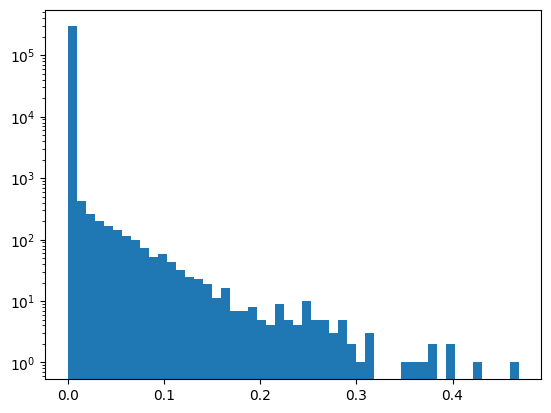

In [12]:
import matplotlib.pyplot as plt
plt.hist(ps_adj.flatten(), bins=50)
plt.yscale('log')

In [13]:
mask_threshold = 1e-3
d = dataset[0][0].shape[0]
print(f"Average num parents per feat in mask: {(ps_adj > mask_threshold).sum() / d}")

Average num parents per feat in mask: 263.55801104972375


In [19]:
from typing import Optional
import time

from modules import AutoEncoderLayers
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from models._sdci import _train

_DEFAULT_STAGE2_KWARGS = {
    "learning_rate": 2e-2,
    "n_epochs": 2_000,
    "alpha": 5e-3,
    "max_gamma": 300,
    "beta": 5e-3,
    "freeze_gamma_at_dag": True,
    "freeze_gamma_threshold": 0.5,
    "threshold": 0.3,
    "n_epochs_check": 100,
    "dag_penalty_flavor": "scc",
}

def train_from_mask(self,
        dataset: Dataset,
        mask: np.ndarray,
        batch_size: int = 512,
        log_wandb: bool = False,
        wandb_project: str = "SDCI",
        wandb_config_dict: Optional[dict] = None,
        B_true: Optional[np.ndarray] = None,
        stage2_kwargs: Optional[dict] = None,
        verbose: bool = False,):
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    sample_batch = next(iter(dataloader))
    assert len(sample_batch) == 2, "Dataset should contain (X, intervention_labels)"
    d = sample_batch[0].shape[1]

    self._stage2_kwargs = {**_DEFAULT_STAGE2_KWARGS.copy(), **(stage2_kwargs or {})}

    self.threshold = self._stage2_kwargs["threshold"]
    
    if log_wandb:
        wandb_config_dict = wandb_config_dict or {}
        wandb.init(
            project=wandb_project,
            name="SDCI",
            config={
                "batch_size": batch_size,
                "stage1_kwargs": self._stage1_kwargs,
                "stage2_kwargs": self._stage2_kwargs,
                **wandb_config_dict,
            },
        )

    start = time.time()
    if B_true is not None:
        print(
            f"Recall of mask: {(B_true.astype(bool) & mask.astype(bool)).sum() / B_true.sum()}"
        )
    print(
        f"Fraction of possible edges in mask: {mask.sum() / (mask.shape[0] * mask.shape[1])}"
    )

    # Begin DAG training
    dag_penalty_flavor = self._stage2_kwargs["dag_penalty_flavor"]
    self._model = AutoEncoderLayers(
        d,
        [10, 1],
        nn.Sigmoid(),
        shared_layers=False,
        adjacency_p=2.0,
        dag_penalty_flavor=dag_penalty_flavor,
        mask=mask,
    )
    optimizer = torch.optim.Adam(
        self._model.parameters(), lr=self._stage2_kwargs["learning_rate"]
    )

    self._model = _train(
        self._model,
        dataloader,
        optimizer,
        self._stage2_kwargs,
        log_wandb=log_wandb,
        print_graph=verbose,
        B_true=B_true,
        start_wandb_epoch=self._stage1_kwargs["n_epochs"],
    )
    self._train_w_mask_runtime_in_sec = time.time() - start
    print(f"Finished training in {self._train_runtime_in_sec} seconds.")


In [20]:
mask = (ps_adj > mask_threshold).astype(int)
model._stage1_kwargs = dict(n_epochs=200)
train_from_mask(model, dataset, mask, batch_size=512, log_wandb=True, wandb_project="cb-perturb-seq", stage2_kwargs=dict(n_epochs=200, n_epochs_check=10, dag_penalty_flavor="power_iteration"))

alpha,███████████████████████████████████████▁
dag,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
epoch_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂
gamma,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
is_prescreen,███████████████████████████████████████▁
l1,█▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▁
l2,█▁▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅█
nll,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
alpha,0.005
dag,0.86263


Fraction of possible edges in mask: 0.48537386933650783
Epoch 0: loss=161.63, gamma=0.00
Epoch 10: loss=140.10, gamma=15.08
Epoch 20: loss=140.61, gamma=30.15
Epoch 30: loss=140.46, gamma=30.15


KeyboardInterrupt: 

In [21]:
unthresh_adj_mtx = model.get_adjacency_matrix(threshold=False)
np.save("/home/justinhong/results/no_ribo_cb_perturb_seq_unthresh_adj_mtx.npy", unthresh_adj_mtx)

(0.0, 100.0)

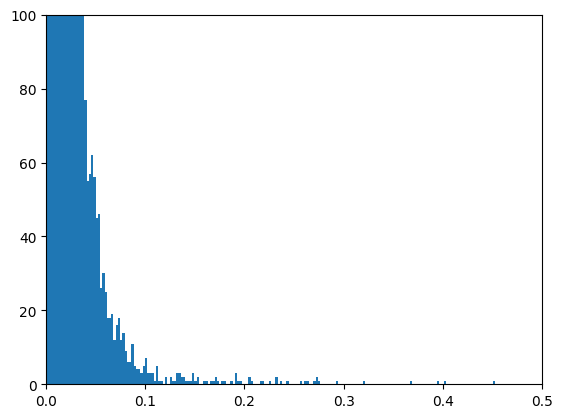

In [22]:
plt.hist(unthresh_adj_mtx.flatten(), bins=200)
plt.xlim((0, 0.5))
plt.ylim((0, 100))

In [23]:
# threshold searching from dcdfg code
from tqdm import tqdm

def _is_acyclic(adjacency):
    """
    Return true if adjacency is a acyclic
    :param np.ndarray adjacency: adjacency matrix
    """
    prod = np.eye(adjacency.shape[0], dtype=adjacency.dtype)
    for _ in range(1, adjacency.shape[0] + 1):
        prod = adjacency @ prod
        if np.trace(prod) != 0:
            return False
    return True


def is_acyclic(adjacency):
    return _is_acyclic(adjacency.astype(float))


def samesign(a, b):
    return a * b > 0


def bisect(func, low, high, T=20):
    "Find root of continuous function where f(low) and f(high) have opposite signs"
    flow = func(low)
    fhigh = func(high)
    assert not samesign(flow, fhigh)
    for i in tqdm(range(T), desc="bisecting"):
        midpoint = (low + high) / 2.0
        fmid = func(midpoint)
        if samesign(flow, fmid):
            low = midpoint
            flow = fmid
        else:
            high = midpoint
            fhigh = fmid
    # after all those iterations, low has one sign, and high another one. midpoint is unknown
    return high


def threshold(adj_mtx):
    # Final thresholding of all edges until DAG is found
    with torch.no_grad():
        def acyc(t):
            return (
                float(
                    is_acyclic(
                        adj_mtx > t
                    )
                )
                - 0.5
            )

        threshold = bisect(acyc, 0, 1)
    return threshold

In [24]:
t = threshold(unthresh_adj_mtx)

bisecting: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.04it/s]


In [25]:
t # min threshold for dag

0.047576904296875

In [26]:
(unthresh_adj_mtx > t).sum()

494

In [27]:
(unthresh_adj_mtx > 3e-2).sum()

1228

In [75]:
thresh_adj_mtx = (unthresh_adj_mtx > t).astype(int)

In [76]:
np.unique(thresh_adj_mtx.sum(axis=1))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 16, 19, 20, 23,
       24])

In [83]:
gene_name_mapping = pd.read_csv("/home/justinhong/data/gene_names.tsv", delimiter="\t", header=None, index_col=0, names=["gene_name"])
gene_name_mapping.head()


,gene_name
ENSG00000116809,ZBTB17
ENSG00000142676,RPL11
ENSG00000188529,SRSF10
ENSG00000133226,SRRM1
ENSG00000090273,NUDC


(array([405.,   0.,   0.,   0.,  54.,   0.,   0.,   0.,  31.,   0.,   0.,
          0.,  15.,   0.,   0.,   0.,   9.,   0.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   4.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   3.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.24,  0.48,  0.72,  0.96,  1.2 ,  1.44,  1.68,  1.92,
         2.16,  2.4 ,  2.64,  2.88,  3.12,  3.36,  3.6 ,  3.84,  4.08,
         4.32,  4.56,  4.8 ,  5.04,  5.28,  5.52,  5.76,  6.  ,  6.24,
         6.48,  6.72,  6.96,  7.2 ,  7.44,  7.68,  7.92,  8.16,  8.4 ,
         8.64,  8.88,  9.12,  9.36

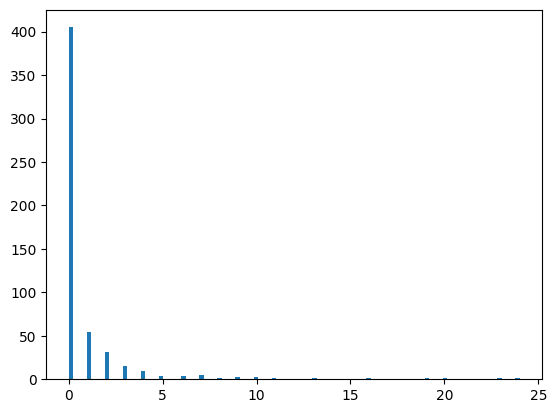

In [77]:
# dist of num of children
plt.hist(thresh_adj_mtx.sum(axis=1), bins=100)

In [86]:
w_children_idxs = np.where(thresh_adj_mtx.sum(axis=1) > 0)[0]
w_children_cts = thresh_adj_mtx.sum(axis=1)[w_children_idxs]
w_children_names = X_df.columns[w_children_idxs]
w_children_df = pd.DataFrame(w_children_cts, index=w_children_names, columns=["count"])
w_children_df = w_children_df.sort_values("count", ascending=False)
w_children_df =w_children_df.join(gene_name_mapping)
w_children_df[:10]

,count,gene_name
ENSG00000254772,24,EEF1G
ENSG00000196531,23,NACA
ENSG00000034510,20,TMSB10
ENSG00000048162,19,NOP16
ENSG00000261236,19,BOP1
ENSG00000167721,16,TSR1
ENSG00000172336,13,POP7
ENSG00000094804,11,CDC6
ENSG00000124207,10,CSE1L
ENSG00000204394,10,VARS


(array([486.,   0.,   0.,  11.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   4.,   0.,   0.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   5.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

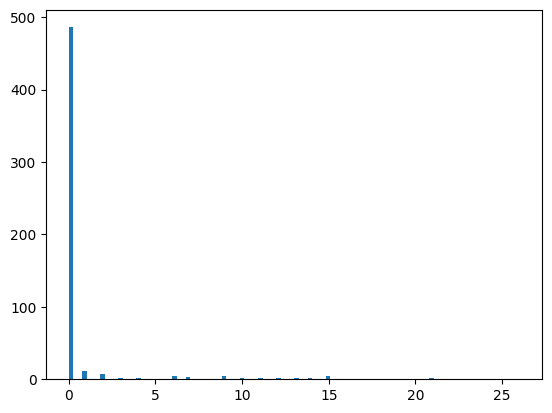

In [92]:
# dist num parents
plt.hist(thresh_adj_mtx.sum(axis=0), bins=100)

In [93]:
w_parents_idxs = np.where(thresh_adj_mtx.sum(axis=0) > 0)[0]
w_parents_cts = thresh_adj_mtx.sum(axis=0)[w_parents_idxs]
w_parents_names = X_df.columns[w_parents_idxs]
w_parents_df = pd.DataFrame(w_parents_cts, index=w_parents_names, columns=["count"])
w_parents_df = w_parents_df.sort_values("count", ascending=False)
w_parents_df = w_parents_df.join(gene_name_mapping)
w_parents_df.head()

,count,gene_name
ENSG00000112118,26,MCM3
ENSG00000088325,25,TPX2
ENSG00000120699,24,EXOSC8
ENSG00000109971,23,HSPA8
ENSG00000170312,21,CDK1


171


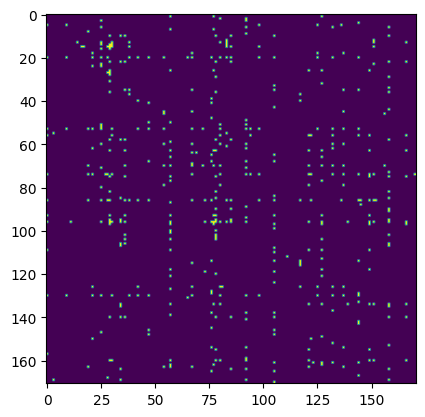

In [94]:
keep_idxs = np.where((thresh_adj_mtx.sum(axis=0) > 0) | (thresh_adj_mtx.sum(axis=1) > 0))[0]
print(len(keep_idxs))
sub_thresh_adj_mtx = thresh_adj_mtx[keep_idxs][:, keep_idxs]
plt.imshow(sub_thresh_adj_mtx)

/home/justinhong/miniconda3/envs/cp/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


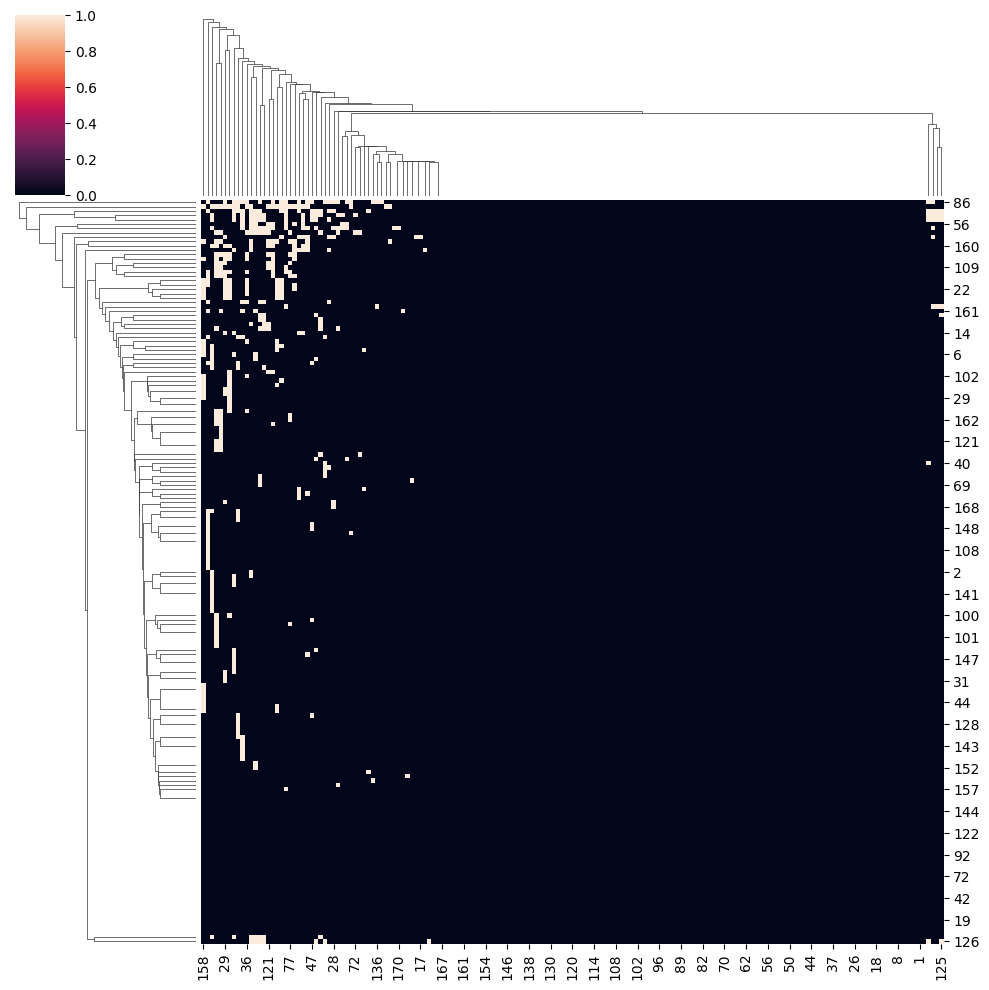

In [95]:
import seaborn as sns
sns.clustermap(sub_thresh_adj_mtx)

In [62]:
# tf list from doi:10.1016/j.cell.2018.01.029
tf_list = pd.read_csv("/home/justinhong/data/tf_list.txt", header=None)[0].tolist()
tf_list[:5]

['ENSG00000137203',
 'ENSG00000008196',
 'ENSG00000087510',
 'ENSG00000008197',
 'ENSG00000116819']

In [63]:
gene_names = X_df.columns[:-1].tolist()
tf_idxs = []
for tf in tf_list:
    try:
        idx = gene_names.index(tf)
    except ValueError:
        continue
    tf_idxs.append(idx)
tf_idxs

[45,
 356,
 486,
 384,
 293,
 246,
 0,
 423,
 504,
 482,
 451,
 466,
 342,
 27,
 19,
 279,
 512,
 187,
 118,
 217]

In [64]:
children_total = unthresh_adj_mtx.sum(axis=1)
tf_df = pd.DataFrame(children_total, index=gene_names, columns=["total"])
tf_df["is_tf"] = 0
tf_df["is_tf"][tf_idxs] = 1
tf_df["thresh_total"] = thresh_adj_mtx.sum(axis=1)

/tmp/ipykernel_1829/943780533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df["is_tf"][tf_idxs] = 1


<Axes: xlabel='total', ylabel='Count'>

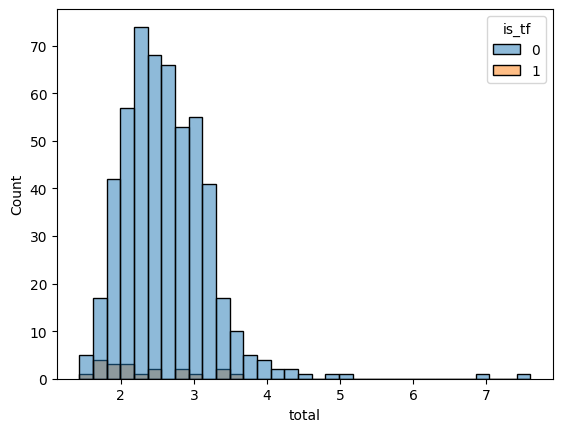

In [65]:
import seaborn as sns

sns.histplot(tf_df, x="total", hue="is_tf")

<Axes: xlabel='thresh_total', ylabel='Count'>

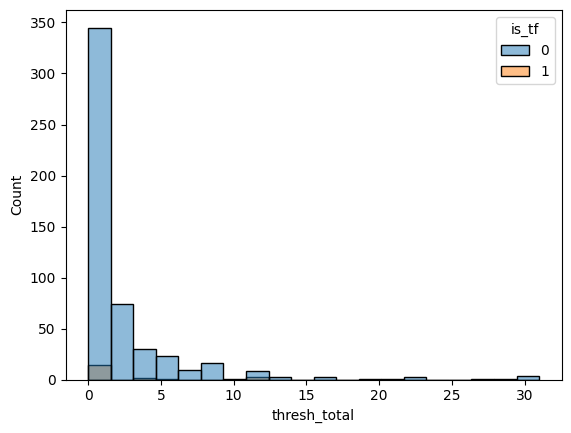

In [66]:
sns.histplot(tf_df, x="thresh_total", hue="is_tf", bins=20)

In [67]:
tf_df[tf_df["is_tf"] == 1]

,total,is_tf,thresh_total
ENSG00000116809,1.663760,1,0
ENSG00000117505,2.396874,1,0
ENSG00000143379,1.971593,1,0
ENSG00000153207,3.080212,1,12
ENSG00000189308,1.891867,1,0
ENSG00000112592,1.994112,1,0
ENSG00000131931,1.788893,1,0
ENSG00000151657,2.116107,1,0
ENSG00000175550,3.304368,1,4
ENSG00000172273,1.624194,1,0


In [68]:
tf_idx = gene_names.index("ENSG00000159140")
tf_children_idxs = np.where(thresh_adj_mtx[tf_idx] == 1)[0]
tf_children = (np.array(gene_names)[tf_children_idxs])
tf_children

array(['ENSG00000112118', 'ENSG00000172115', 'ENSG00000215021',
       'ENSG00000120699', 'ENSG00000161981', 'ENSG00000140990',
       'ENSG00000167978', 'ENSG00000131153', 'ENSG00000108561',
       'ENSG00000099800', 'ENSG00000130816'], dtype='<U15')

In [69]:
thresh_adj_mtx.sum(axis=0)[tfdp1_children_idxs]

array([24, 43, 33, 33, 25])

In [91]:
parent_idx = gene_names.index("ENSG00000196531")
parent_children_idxs = np.where(thresh_adj_mtx[parent_idx] == 1)[0]
parent_children = (np.array(gene_names)[parent_children_idxs])
gene_name_mapping.loc[parent_children]

,gene_name
ENSG00000090273,NUDC
ENSG00000182004,SNRPE
ENSG00000115053,NCL
ENSG00000113810,SMC4
ENSG00000114867,EIF4G1
ENSG00000138778,CENPE
ENSG00000164109,MAD2L1
ENSG00000112118,MCM3
ENSG00000104408,EIF3E
ENSG00000044574,HSPA5


In [88]:
parent_children_idxs

array([  3,  38,  75, 100, 104, 121, 124, 174, 219, 239, 248, 251, 257,
       265, 269, 294, 381, 404, 444, 466, 474, 497, 530])

In [89]:
parent_idx

308